In [30]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 


In [31]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() 

In [32]:
len(X_train)

60000

In [33]:
len(X_test)

10000

In [34]:
X_train[0].shape

(28, 28)

In [48]:
X_train = X_train / 255
X_test = X_test / 255

In [49]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

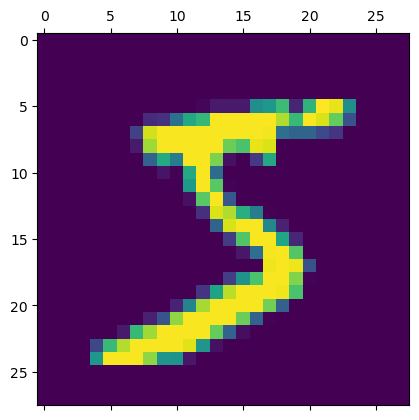

In [50]:
plt.matshow(X_train[0])

In [51]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [52]:
X_train.shape


(60000, 28, 28)

In [53]:
#falttened the array changing the dimension to(60000,28*28)
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape


(10000, 784)

In [54]:
#a simple neural network will be created which will have 
#2 layers as input element and 10 layers as output element 

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 285us/step - loss: 0.4766 - accuracy: 0.8743
Epoch 2/5
1875/1875 [==============================] - 1s 273us/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 273us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 273us/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 273us/step - loss: 0.2664 - accuracy: 0.9254


In [55]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 250us/step - loss: 0.2691 - accuracy: 0.9246


[0.2691265344619751, 0.9246000051498413]

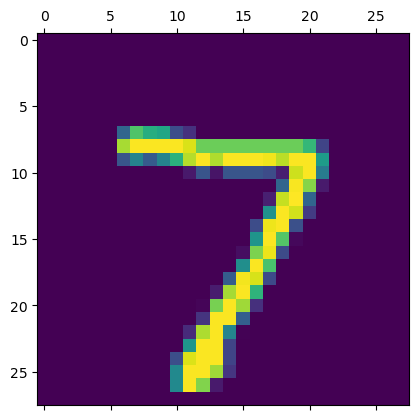

In [58]:
plt.matshow(X_test[0])

In [62]:
y_predicted = model.predict(X_test_flattened) 
y_predicted[0]

313/313 [==============================] - 0s 207us/step


array([2.8014978e-02, 3.0543319e-07, 6.5454088e-02, 9.5393836e-01,
       2.0806973e-03, 1.1009530e-01, 1.3015489e-06, 9.9982792e-01,
       8.7312073e-02, 6.1961859e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[0])

7

In [69]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [71]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    8,  918,   20,    7,    3,   11,   10,   42,    3],
       [   4,    0,   17,  927,    0,   17,    2,   12,   25,    6],
       [   2,    1,    2,    2,  915,    0,   11,    4,   10,   35],
       [  12,    2,    3,   41,   11,  764,   13,    7,   34,    5],
       [  15,    3,    7,    1,    7,   11,  908,    2,    4,    0],
       [   2,    5,   22,    4,    7,    0,    0,  953,    6,   29],
       [   7,    6,    7,   19,    9,   25,    8,   12,  875,    6],
       [  11,    7,    1,   10,   24,    7,    0,   30,    9,  910]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

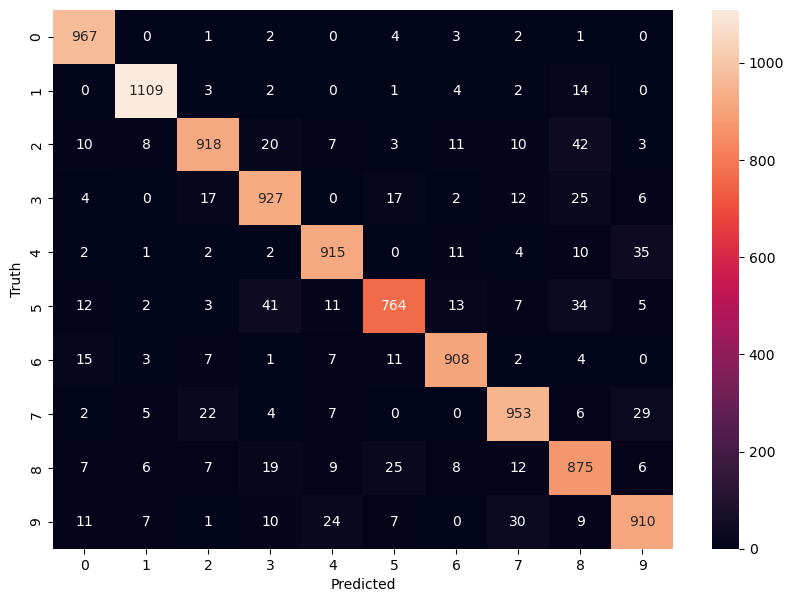

In [72]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
#Adding a hidden layer to the same model 

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 483us/step - loss: 0.2730 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 1s 442us/step - loss: 0.1267 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 1s 448us/step - loss: 0.0898 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 1s 438us/step - loss: 0.0683 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 1s 440us/step - loss: 0.0534 - accuracy: 0.9834


In [74]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 310us/step - loss: 0.0824 - accuracy: 0.9746


[0.08240748941898346, 0.9746000170707703]

313/313 [==============================] - 0s 266us/step


Text(95.72222222222221, 0.5, 'Truth')

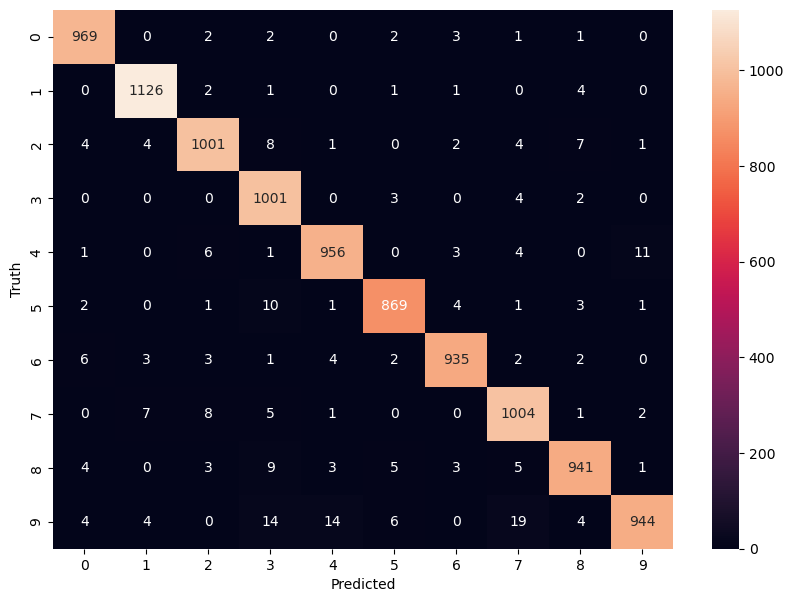

In [76]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
#using keras inbuilt flattened array function to avoid explicite flattening of array

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 526us/step - loss: 0.2677 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 1s 481us/step - loss: 0.1200 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 1s 446us/step - loss: 0.0832 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 1s 492us/step - loss: 0.0635 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 1s 468us/step - loss: 0.0494 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 1s 424us/step - loss: 0.0410 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 1s 434us/step - loss: 0.0328 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.0272 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 1s 428us/step - loss: 0.0230 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 1s 413u

In [ ]:
#exercise 
#check diffrent optimizers and diffrent loss functions and diffrent activation functions from keras documentation 